In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
# 集成方法回归库
from sklearn.ensemble import GradientBoostingRegressor
# 导入交叉检验库
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import mean_squared_error as mse

In [3]:
raw_data = pd.read_table('D:\Code\Commodity Sales Forecast Based On The Combination Of Marketing Elements\Data\products_sales.txt', delimiter=',')

In [7]:
# 数据概览
#打印原始数据后2条
print('{:*^60}'.format('Data overview:'),'\n',raw_data.tail(2))
# 数据类型
print('{:*^60}'.format('Data dtypes:'),'\n',raw_data.dtypes)

***********************Data overview:*********************** 
      limit_infor  campaign_type  campaign_level  product_level  \
729            0              6               0              1   
730            0              6               0              1   

     resource_amount  email_rate  price  discount_rate  hour_resouces  \
729                8         0.8  150.0           0.87            987   
730                9         0.8  149.0           0.84           1448   

     campaign_fee  orders  
729          2298    3285  
730          3392    4840  
************************Data dtypes:************************ 
 limit_infor          int64
campaign_type        int64
campaign_level       int64
product_level        int64
resource_amount      int64
email_rate         float64
price              float64
discount_rate      float64
hour_resouces        int64
campaign_fee         int64
orders               int64
dtype: object


In [8]:
# 缺失值统计
# 查看每一列是否具有缺失值
na_cols = raw_data.isnull().any(axis=0)  
print('{:*^60}'.format('NA Cols:'))
# 查看具有缺失值的列
print(na_cols[na_cols]==True)
# 查看具有缺失值的行总记录数
print('Total NA lines is: {0}'.format(raw_data.isnull().any(axis=1).sum()))  

**************************NA Cols:**************************
price    True
dtype: bool
Total NA lines is: 2


In [9]:
# 缺失值处理
# 缺失值替换为均值
sales_data = raw_data.fillna(raw_data['price'].mean())  
sales_data.head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529


In [10]:
# 分割数据集X和y
num = int(0.7*sales_data.shape[0])
X,y = sales_data.iloc[:, :-1],sales_data.iloc[:, -1]
X_train,X_test = X.iloc[:num,:],X.iloc[num:,:]
y_train,y_test = y.iloc[:num],y.iloc[num:]

In [11]:
# 模型最优化参数训练及检验
# 建立GradientBoostingRegressor回归对象
model_gbr = GradientBoostingRegressor() 
# 定义要优化的参数信息
parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'n_estimators': [10, 50, 100],
              'learning_rate': [0.05, 0.1, 0.15],
              'max_depth': [2, 3, 4],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 2, 4]} 
# 建立交叉检验模型对象
model_gs = GridSearchCV(estimator=model_gbr,
                        param_grid=parameters, cv=3, n_jobs=-1)
# 训练交叉检验模型
model_gs.fit(X_train, y_train)
# 获得交叉检验模型得出的最优得分
print('Best score is:', model_gs.best_score_)
# 获得交叉检验模型得出的最优参数
print('Best parameter is:', model_gs.best_params_)  

Best score is: 0.9552307907041245
Best parameter is: {'learning_rate': 0.15, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [12]:
# 获取最佳训练模型
# 获得交叉检验模型得出的最优模型对象
model_best = model_gs.best_estimator_ 

In [13]:
# 模型交叉检验结果
print(model_gs.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_loss', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])


In [14]:
model_gs.cv_results_.get('mean_test_score')

array([-3.05816147e-01,  8.06504643e-01,  9.14328847e-01, -3.05816147e-01,
        8.06504643e-01,  9.14852777e-01, -3.05816147e-01,  8.06504643e-01,
        9.13795716e-01, -3.05816147e-01,  8.06504643e-01,  9.18783300e-01,
       -3.05816147e-01,  8.06504643e-01,  9.18783300e-01, -3.05816147e-01,
        8.06504643e-01,  9.18783300e-01, -3.05816147e-01,  8.06504643e-01,
        9.19481419e-01, -3.05816147e-01,  8.06504643e-01,  9.19481419e-01,
       -3.05816147e-01,  8.06504643e-01,  9.19481419e-01, -1.61049733e-01,
        8.69147266e-01,  9.12992870e-01, -1.61049733e-01,  8.69145199e-01,
        9.12449859e-01, -1.61049733e-01,  8.69145199e-01,  9.12551143e-01,
       -1.61049733e-01,  8.68683711e-01,  9.09621015e-01, -1.61049733e-01,
        8.68683711e-01,  9.09458709e-01, -1.61049733e-01,  8.68683711e-01,
        9.05954722e-01, -1.59828437e-01,  8.76270168e-01,  9.05748593e-01,
       -1.59828437e-01,  8.76115487e-01,  9.05748593e-01, -1.59828437e-01,
        8.76323600e-01,  

In [15]:
# 回归指标评估
pre_test = model_best.predict(X_test)
mse_score = mse(pre_test,y_test)

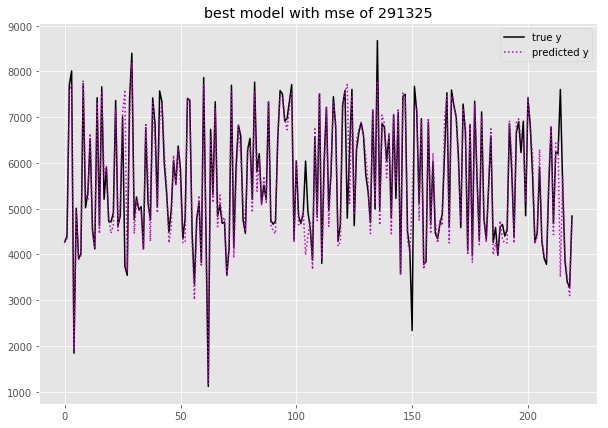

In [16]:
# 模型拟合程度
# 应用ggplot自带样式库
plt.style.use("ggplot")
# 建立画布对象
plt.figure(figsize=(10,7))
# 画出原始变量的曲线
plt.plot(np.arange(X_test.shape[0]), y_test, linestyle='-', color='k', label='true y') 
 # 画出预测变量曲线
plt.plot(np.arange(X_test.shape[0]), pre_test, linestyle=':', color='m',
         label='predicted y') 
plt.title('best model with mse of {}'.format(int(mse_score)))
# 设置图例位置
plt.legend(loc=0)
# 保存
plt.savefig('D:\Code\Commodity Sales Forecast Based On The Combination Of Marketing Elements\Result\拟合图.png')

In [13]:
# 要预测的新数据记录
New_X = np.array([[1, 1, 0, 1, 15, 0.5, 177, 0.66, 101, 798]])  
print('{:*^60}'.format('Predicted orders:'))
# 打印输出预测值
print(model_best.predict(New_X).round(0))  

*********************Predicted orders:**********************
[833.]
